<a href="https://colab.research.google.com/github/evrimakgul/Deep_Learning/blob/master/IMDB%20comments%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [1]:
%tensorflow_version 2.x
from tensorflow.keras.datasets import imdb
import numpy as np
from sklearn.model_selection import train_test_split
!pip install numpy==1.16.1 # Keras IMDB data set is uncompatible with the current version of "numpy". Thus we downgrade "numpy" to a compatible version of it for Keras IMDB data set. This will require a restart of the "runtime". After the restart when we run the cell again, it should be working fine.
import numpy as np
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # When we import the data we only select the 10,000 most common words in the reviews.

TensorFlow 2.x selected.


In [33]:
# The train_labels and test_labels consist of 0 and 1, representing negative (0s) and positve (1s) reviews, respectivly.
print(train_labels[0:10])

[1 0 0 1 0 0 1 0 1 0]


In [4]:
# There are 25,000 traing and text data 
print(train_data.shape)

(25000,)


In [37]:
# The train_data and test_data are already converted into word indices.  Each number below represents a word from the word index.  The word index is 10,000 digits: 0 to 9999
print(train_data[0][:9]) # the first element of train data ([0]) and showing the first 9 elements of it ([:9]).
print(len(train_data[0])) # it has 218 words in it. There is 24999 more elements in the set like this.

[1, 14, 22, 16, 43, 530, 973, 1622, 1385]
218


In [40]:
# Let's get and print the word index (only the most common 10000 of them)
wi = imdb.get_word_index()
# print(wi)
print(tuple(wi.items())[0:5]) # only 5 of them if we do not need to see all 10000 of it.

(('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951))


In [41]:
# We can sort the items in the word index
import operator
sorted_by_values = sorted(wi.items(), key=operator.itemgetter(1))
sorted_by_values[:23] # the first 23 words by their usage frequency

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10),
 ('this', 11),
 ('that', 12),
 ('was', 13),
 ('as', 14),
 ('for', 15),
 ('with', 16),
 ('movie', 17),
 ('but', 18),
 ('film', 19),
 ('on', 20),
 ('not', 21),
 ('you', 22),
 ('are', 23)]

In [42]:
# We can convert the word index back to a written review:
reverse_word_index = dict(
    [(value, key) for (key, value) in wi.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]) # here is the 9th review
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [0]:
# We cannot add a single vector to a neural network. The data needs to be converted to a tensor.  This function will create a tensor that is 25000 by 10000. 25000 is the number of samples
# and 10000 is the number of uniqe words. The tensor will have all zeros except for ones where that word is in the review.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [0]:
# Apply the vectorize function to the train_data and test_data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [45]:
# View the train shape, values, and dimensions
print(x_train.shape)
print(x_train[0])
print(x_train.ndim)

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]
2


In [0]:
# Convert the y targets to float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
# Import the keras libraries
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Flatten, Dense

In [0]:
# Build the model architecture.  Input shape must equal the number of vectors or (unique words).
# Add one hidden layer with 16 units.  Keep the activation function as 'relu'
# Since we have a binary classification, the output activation function will be 'sigmoid'
# We will keep with the 'adam' optomizer function, loss = 'binary_crossentropy', and metrics = 'accuracy'
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle= True)

In [50]:
# Fit the model to the training data. 
history = model.fit(x_train,
                   y_train,
                   epochs = 20,
                   batch_size = 500,
                   validation_data = (x_valid, y_valid))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 3s 151us/sample - loss: 0.5048 - accuracy: 0.7926 - val_loss: 0.3417 - val_accuracy: 0.8784
Epoch 2/20
20000/20000 [==============================] - 2s 93us/sample - loss: 0.2564 - accuracy: 0.9105 - val_loss: 0.2794 - val_accuracy: 0.8964
Epoch 3/20
20000/20000 [==============================] - 2s 91us/sample - loss: 0.1824 - accuracy: 0.9380 - val_loss: 0.2800 - val_accuracy: 0.8926
Epoch 4/20
20000/20000 [==============================] - 2s 92us/sample - loss: 0.1395 - accuracy: 0.9549 - val_loss: 0.2971 - val_accuracy: 0.8918
Epoch 5/20
20000/20000 [==============================] - 2s 94us/sample - loss: 0.1110 - accuracy: 0.9667 - val_loss: 0.3213 - val_accuracy: 0.8874
Epoch 6/20
20000/20000 [==============================] - 2s 93us/sample - loss: 0.0888 - accuracy: 0.9765 - val_loss: 0.3589 - val_accuracy: 0.8866
Epoch 7/20
20000/20000 [==============================] 

In [55]:
import pandas as pd
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
print(hist.tail())

        loss  accuracy  val_loss  val_accuracy
15  0.006850   0.99995  0.750996        0.8654
16  0.005336   0.99995  0.782041        0.8646
17  0.004263   1.00000  0.809000        0.8660
18  0.003474   1.00000  0.833003        0.8668
19  0.002894   1.00000  0.857021        0.8666


In [0]:
# Let's plot the Loss vs Epochs and Accuracy vs Epochs
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)

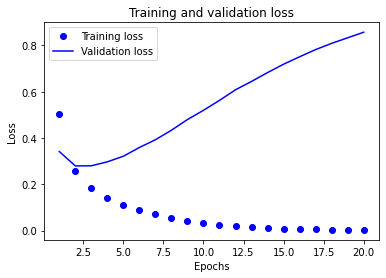

In [57]:
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

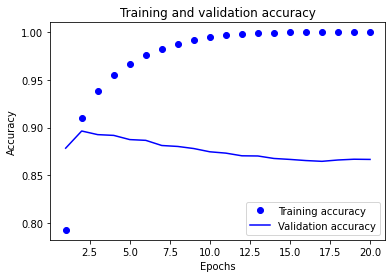

In [58]:
plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
# It looks like the Validation Loss increases after about 5 Epochs and the validation accuracy decreases after about 
# 5 epochs.  Lets refit the data but only use 5 epochs and then apply the model on the test data
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train,
          y_train,
          epochs = 3,
          batch_size = 500)
results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

Train on 20000 samples
Epoch 1/3
20000/20000 [==============================] - 2s 112us/sample - loss: 0.5211 - accuracy: 0.7949
Epoch 2/3
20000/20000 [==============================] - 2s 80us/sample - loss: 0.2707 - accuracy: 0.9069
Epoch 3/3
25000/25000 [==============================] - 3s 100us/sample - loss: 0.2882 - accuracy: 0.8835
['loss', 'accuracy']
[0.28816632390975955, 0.88352]


In [60]:
# View the results
model.predict(x_test)

array([[0.13385975],
       [0.9998024 ],
       [0.9301454 ],
       ...,
       [0.10138951],
       [0.12061323],
       [0.61308354]], dtype=float32)

In [61]:
# View the results rounded to a 1 or 0
ans = model.predict(x_test)
np.rint(ans)

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)